In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# link of project : https://archive.ics.uci.edu/ml/datasets/bank+marketing
df=pd.read_csv('bank-full (1).csv')
df.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  subscribed  
0          93.994          -36.4      4.857       5191.0          no  
1          93.994          -36.4      4.857       5191.0          no  
2          93.994          -36.4      4.857       5191.0          no  
3          93.994          -36.4      4.857       5191.0          no  
4          93.994          -36.4      4.857       5191.0          no  

[5 rows x 21 columns]

In [3]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
subscribed        0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

# EDA

In [5]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'subscribed'],
      dtype='object')

In [6]:
df['default'].value_counts()

default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64

<Axes: xlabel='age', ylabel='Count'>

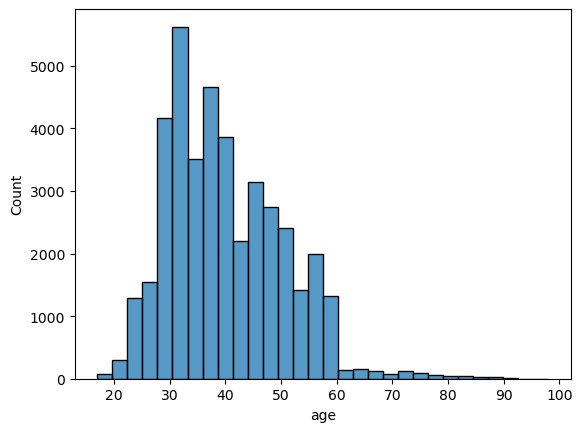

In [7]:
sns.histplot(data=df , x='age' , bins=30)

<Axes: xlabel='age', ylabel='Count'>

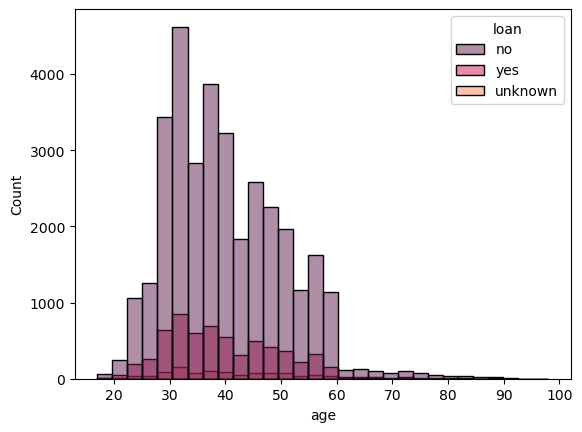

In [8]:
sns.histplot(data=df , x='age' , hue='loan' , bins=30 , palette='rocket')

<Axes: xlabel='pdays', ylabel='Count'>

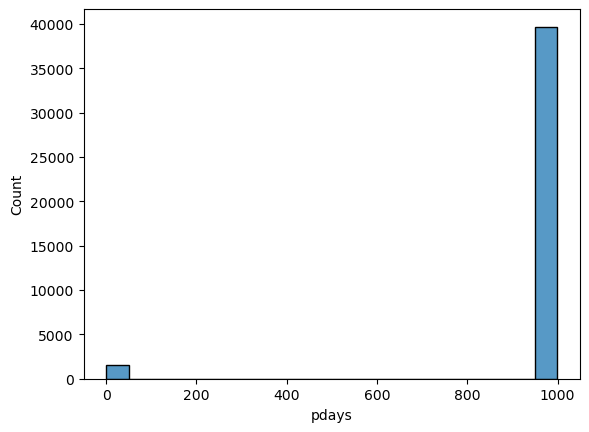

In [9]:
sns.histplot(data=df , x='pdays' , bins=20)

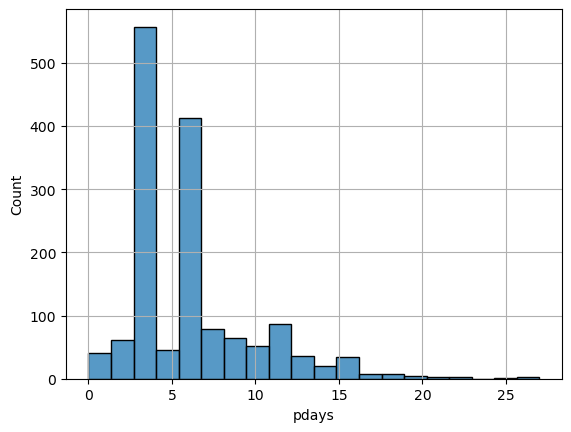

In [10]:
sns.histplot(data=df[df['pdays']!=999] , x='pdays' , bins=20)
plt.grid()

In [11]:
sum(df['duration']>2000)

60

(0.0, 2000.0)

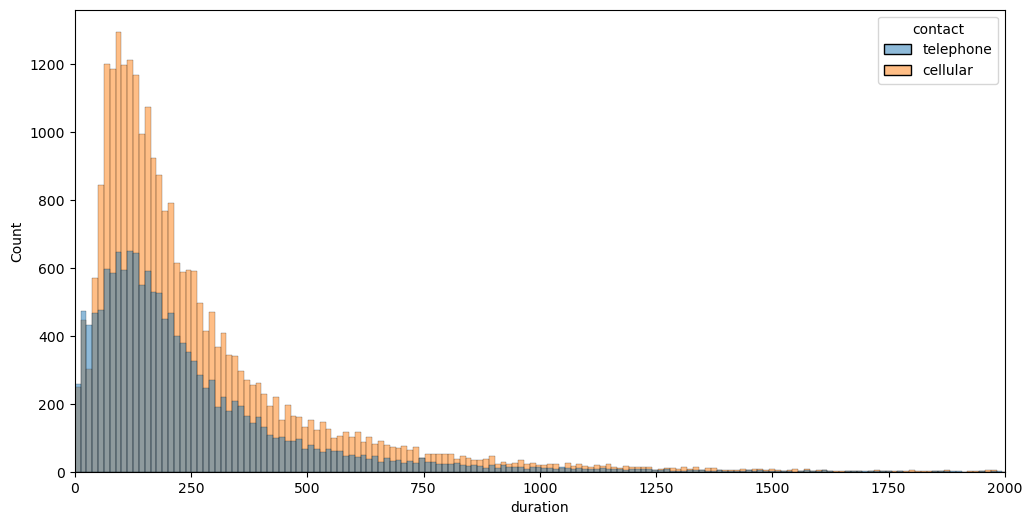

In [12]:
plt.figure(figsize=(12,6))
sns.histplot(data=df , x='duration' , hue='contact')
plt.xlim(0 , 2000)

In [13]:
df['previous'].value_counts()

previous
0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: count, dtype: int64

<Axes: xlabel='previous', ylabel='count'>

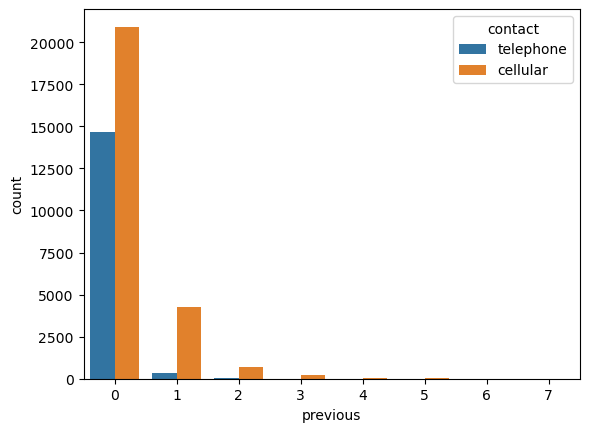

In [14]:
sns.countplot(data=df , x='previous' , hue='contact')

<Axes: xlabel='poutcome', ylabel='count'>

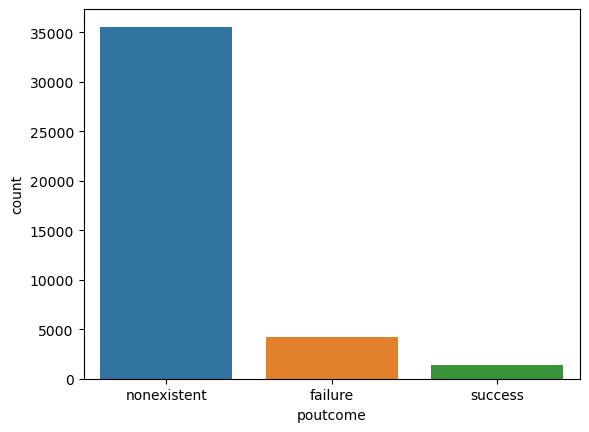

In [15]:
sns.countplot(data=df , x='poutcome' , hue='poutcome')

<Axes: xlabel='contact', ylabel='count'>

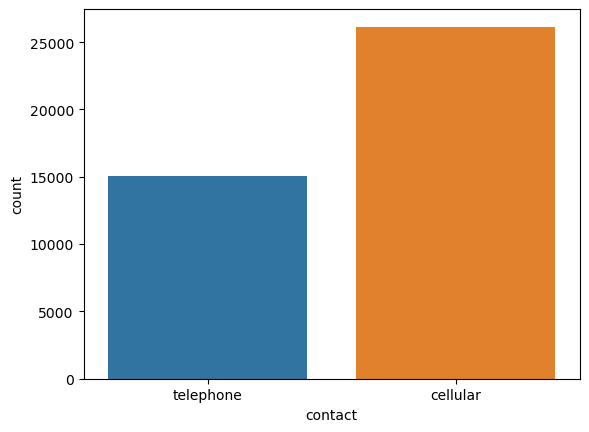

In [16]:
sns.countplot(data=df , x='contact' , hue='contact')

In [17]:
df['previous'].value_counts()

previous
0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: count, dtype: int64

In [18]:
df['previous'].value_counts().sum()-35563

5625

# Categorical Features

In [19]:
df['job'].value_counts()

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

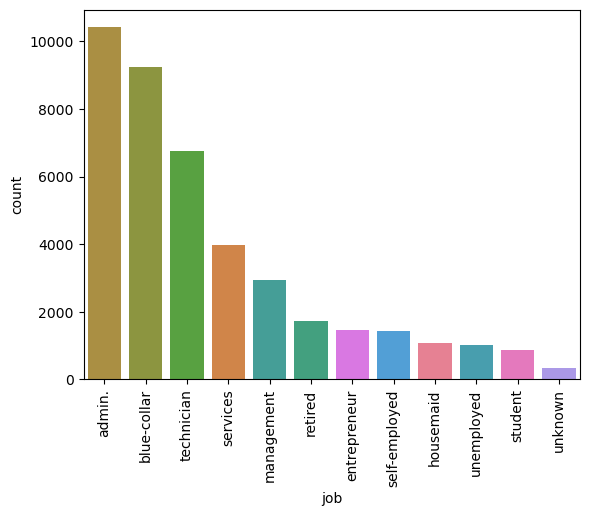

In [20]:
sns.countplot(data=df , x='job' , hue='job' , order=df['job'].value_counts().index)#for asending=false -->[::-1]after value_counts()
plt.xticks(rotation=90);

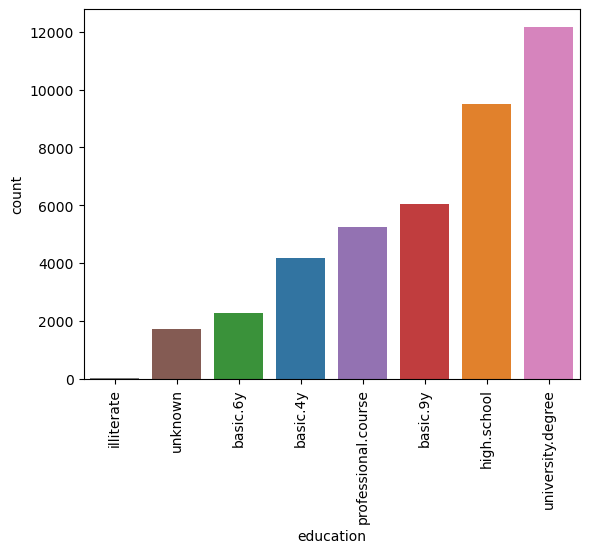

In [21]:
sns.countplot(data=df , x='education' , hue='education' , order=df['education'].value_counts()[::-1].index)
plt.xticks(rotation=90);

<Axes: xlabel='education', ylabel='count'>

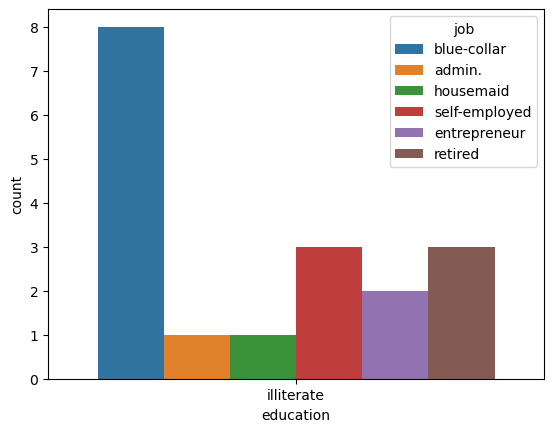

In [24]:
sns.countplot(data=df[df['education']=='illiterate'] , x='education' , hue='job' )

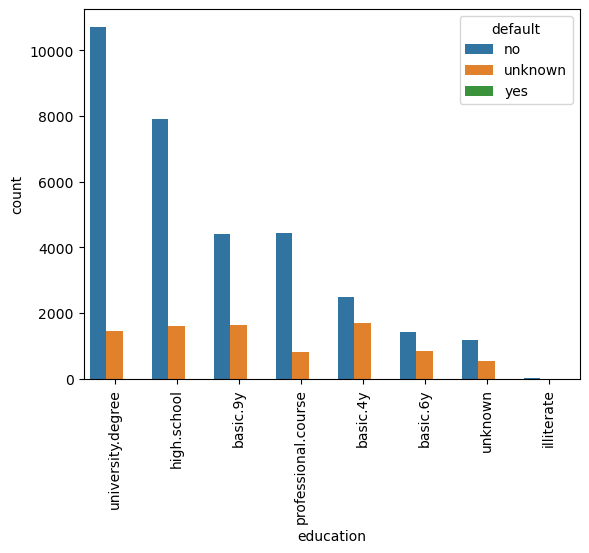

In [25]:
sns.countplot(data=df , x='education' , hue='default' , order= df['education'].value_counts().index)
plt.xticks(rotation=90);

In [26]:
len(df[df['default']=='yes'])

3

<Axes: xlabel='default', ylabel='count'>

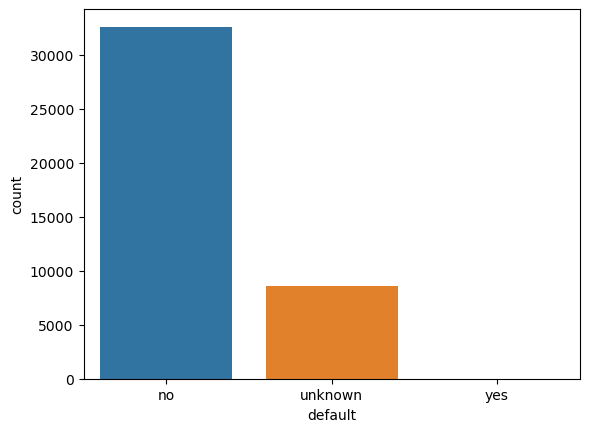

In [27]:
sns.countplot(data=df , x='default' , hue='default')

# clustering

In [3]:
X=pd.get_dummies(df)
X

age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0       56       261         1    999         0           1.1          93.994   
1       57       149         1    999         0           1.1          93.994   
2       37       226         1    999         0           1.1          93.994   
3       40       151         1    999         0           1.1          93.994   
4       56       307         1    999         0           1.1          93.994   
...    ...       ...       ...    ...       ...           ...             ...   
41183   73       334         1    999         0          -1.1          94.767   
41184   46       383         1    999         0          -1.1          94.767   
41185   56       189         2    999         0          -1.1          94.767   
41186   44       442         1    999         0          -1.1          94.767   
41187   74       239         3    999         1          -1.1          94.767   

       cons.conf.idx  euribor3m  nr.employed  ...  day_of_week_fri  \
0              -36.4      4.857       5191.0  ...            False   
1              -36.4      4.857       5191.0  ...            False   
2              -36.4      4.857       5191.0  ...            False   
3              -36.4      4.857       5191.0  ...            False   
4              -36.4      4.857       5191.0  ...            False   
...              ...        ...          ...  ...              ...   
41183          -50.8      1.028       4963.6  ...             True   
41184          -50.8      1.028       4963.6  ...             True   
41185          -50.8      1.028       4963.6  ...             True   
41186          -50.8      1.028       4963.6  ...             True   
41187          -50.8      1.028       4963.6  ...             True   

       day_of_week_mon  day_of_week_thu  day_of_week_tue  day_of_week_wed  \
0                 True            False            False            False   
1                 True            False            False            False   
2                 True            False            False            False   
3                 True            False            False            False   
4                 True            False            False            False   
...                ...              ...              ...              ...   
41183            False            False            False            False   
41184            False            False            False            False   
41185            False            False            False            False   
41186            False            False            False            False   
41187            False            False            False            False   

       poutcome_failure  poutcome_nonexistent  poutcome_success  \
0                 False                  True             False   
1                 False                  True             False   
2                 False                  True             False   
3                 False                  True             False   
4                 False                  True             False   
...                 ...                   ...               ...   
41183             False                  True             False   
41184             False                  True             False   
41185             False                  True             False   
41186             False                  True             False   
41187              True                 False             False   

       subscribed_no  subscribed_yes  
0               True           False  
1               True           False  
2               True           False  
3               True           False  
4               True           False  
...              ...             ...  
41183          False            True  
41184           True           False  
41185           True           False  
41186          False            True  
41187           True           Fal

In [4]:
X.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oc

In [4]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
X=scale.fit_transform(X)

In [5]:
from sklearn.cluster import KMeans

In [6]:
model=KMeans(n_clusters=2)
cluster_label=model.fit_predict(X)

In [8]:
len(X)

41188

In [9]:
len(cluster_label)

41188

In [35]:
cluster_label

array([1, 1, 1, ..., 0, 0, 0])

In [7]:
type(X)

numpy.ndarray

In [9]:
X=pd.DataFrame(X , columns=['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed', 'poutcome_failure',
       'poutcome_nonexistent', 'poutcome_success', 'subscribed_no',
       'subscribed_yes'])

In [44]:
print(cluster_label.shape)

(41188,)


In [10]:
X['cluster']=cluster_label

<Axes: >

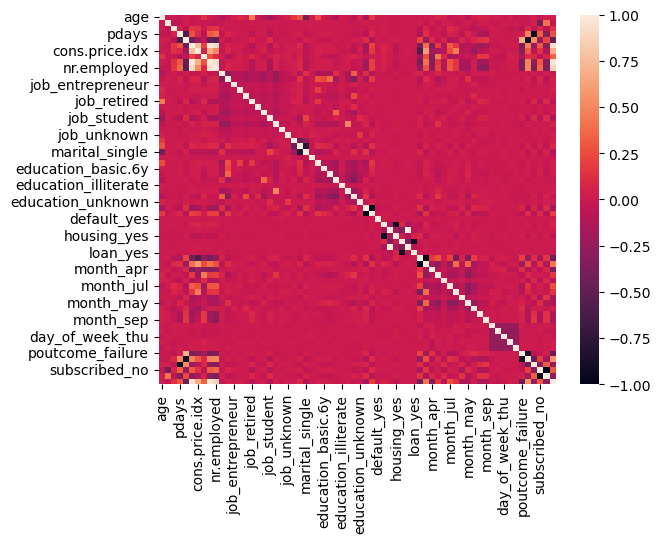

In [14]:
sns.heatmap(X.corr())

In [11]:
X.corr()['cluster'][:-1].sort_values()

euribor3m              -0.959328
emp.var.rate           -0.932622
nr.employed            -0.886190
cons.price.idx         -0.679350
poutcome_nonexistent   -0.544406
                          ...   
subscribed_yes          0.294472
month_apr               0.357942
contact_cellular        0.410444
poutcome_failure        0.464320
previous                0.478493
Name: cluster, Length: 65, dtype: float64

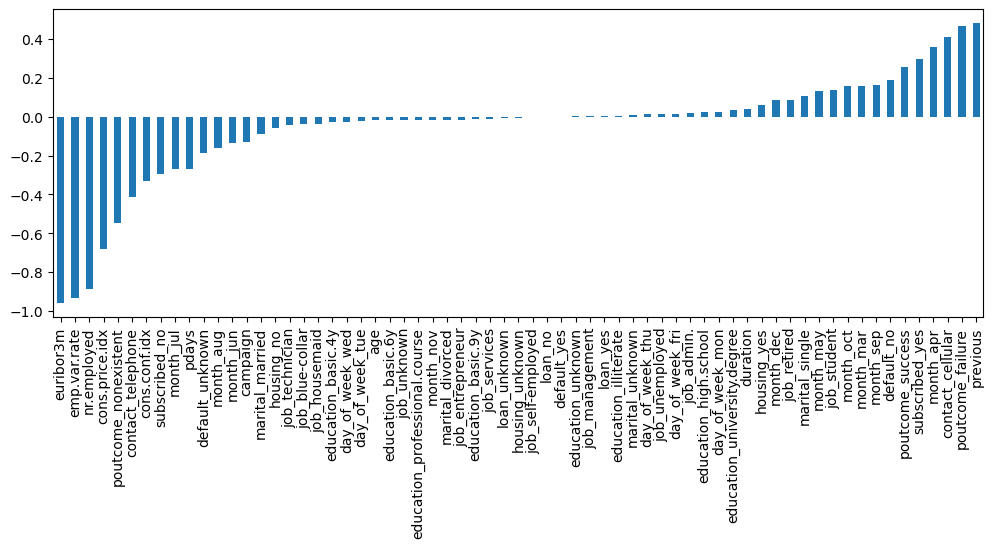

In [12]:
plt.figure(figsize=(12,4))
X.corr()['cluster'][:-1].sort_values().plot(kind='bar')
plt.xticks(rotation=90);

# Selection of K value

In [13]:
ssd=[]
for k in range(1,20):
    model=KMeans(n_clusters=k)
    model.fit(X)
    #Sum of squared distances of samples to their closest cluster center.
    ssd.append(model.inertia_)

# تحلیل مقدار کاهشSum of squared distancesاز مراکز خوشه

Text(0, 0.5, 'Sum of Squared Distance')

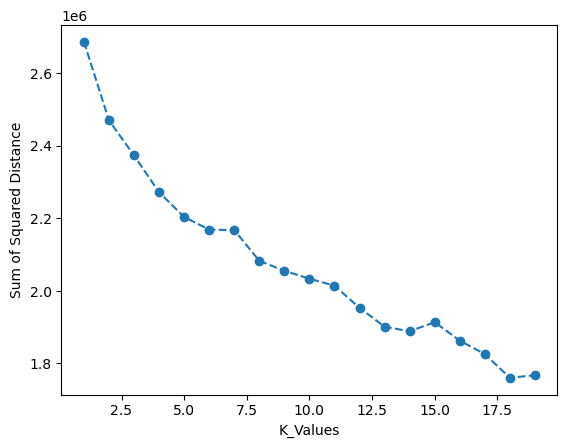

In [15]:
plt.plot(range(1,20) , ssd , 'o--')
plt.xlabel('K_Values')
plt.ylabel("Sum of Squared Distance")

In [16]:
ssd

[2686560.393002819,
 2469792.3673020783,
 2373265.229741314,
 2271653.5919106463,
 2203670.2044067495,
 2168700.3418314676,
 2167431.9237695774,
 2082984.609011217,
 2055291.7678590268,
 2033464.0294651878,
 2014288.892730596,
 1953124.1601270947,
 1901328.722617238,
 1888514.4557972809,
 1913635.410160914,
 1862827.245947579,
 1825778.7764405124,
 1760372.1426103592,
 1767484.4531182759]

In [17]:
pd.Series(ssd).diff()

0               NaN
1    -216768.025701
2     -96527.137561
3    -101611.637831
4     -67983.387504
5     -34969.862575
6      -1268.418062
7     -84447.314758
8     -27692.841152
9     -21827.738394
10    -19175.136735
11    -61164.732604
12    -51795.437510
13    -12814.266820
14     25120.954364
15    -50808.164213
16    -37048.469507
17    -65406.633830
18      7112.310508
dtype: float64

Text(0, 0.5, 'Sum of Squared Distance')

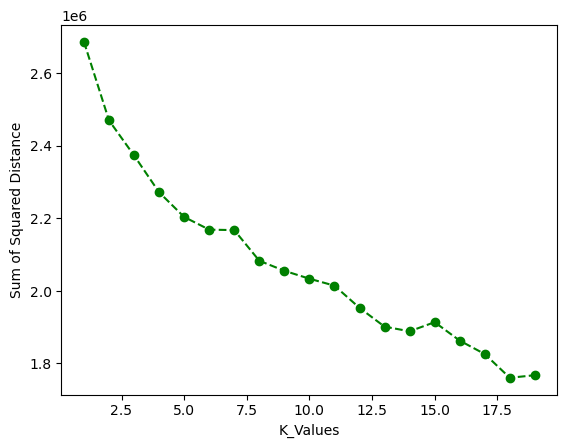

In [23]:
plt.plot(range(1,20) , ssd , 'go--' )
plt.xlabel('K_Values')
plt.ylabel("Sum of Squared Distance")

<Axes: >

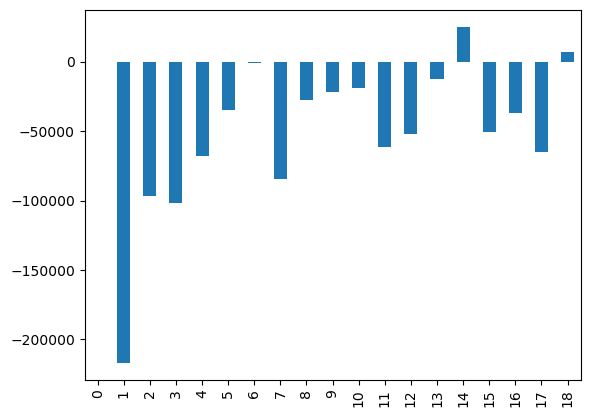

In [25]:
pd.Series(ssd).diff().plot(kind='bar')